# Basic Statistics



## Probability Distributions

- ### Discrete distributions (probability mass functions):

     * #### Binomial

<space> <space><space> <space>A random variable $X$ that has a binomial distribution, represents the **number of successes** in a sequence of $n$ independent **binary outcome** trials, each of which yields success with probability $p$.
$$E(X) = n\cdot p$$
$$ Var(X) = n\cdot p(1-p)$$

[**stats.binom**](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) object

*What is the probability of getting 2 heads out of 10 flips of a fair coin? *

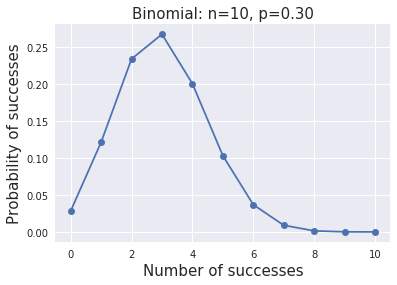

In [122]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

n = 10 # number of observations
p = 0.3 # prob. of success
k = np.arange(0,11) # possible outcomes

#calculate mass function
binomial = binom.pmf(k, n, p)

plt.plot(k, binomial, 'o-')
plt.title('Binomial: n=%d, p=%.2f' %(n,p), fontsize=15)
plt.xlabel('Number of successes', fontsize=15)
plt.ylabel('Probability of successes', fontsize=15)
plt.show()

We can draw a number of random variables from a binomial distribution with the **.rvs()** method.  

Mean: 2.9687 
SD: 1.43036 
--------------------
Mean: 3 
SD: 1.44914 
Skewness: 0.276026 
Kurtosis: -0.12381 


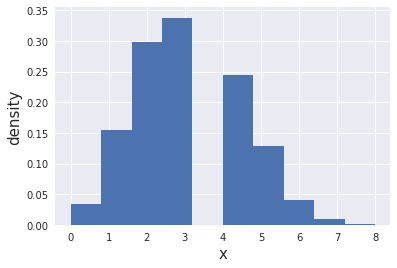

In [123]:
binom_sim =  binom.rvs(n=n, p=p, size =10000)
print("Mean: %g " %np.mean(binom_sim))
print("SD: %g " %np.std(binom_sim,ddof=1))
print("--"*10)
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print("Mean: %g " %mean)
print("SD: %g " %np.sqrt(var))
print("Skewness: %g " %skew)
print("Kurtosis: %g " %kurt)

plt.hist(binom_sim, bins=10, normed=True)
plt.xlabel("x", fontsize=15)
plt.ylabel("density", fontsize=15)
plt.show()

We may specify the parameters of the distribution and call the distribution object as a function to "freeze" the distribution.

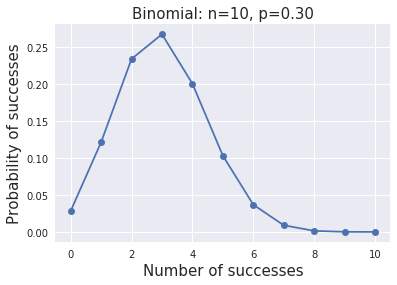

In [124]:
frozen_binom = binom(n,p)
plt.plot(k,frozen_binom.pmf(k),'o-')
plt.title('Binomial: n=%d, p=%.2f' %(n,p), fontsize=15)
plt.xlabel('Number of successes', fontsize=15)
plt.ylabel('Probability of successes', fontsize=15)
plt.show()


   * #### Poisson:
        A random variable $X$ that has a Poisson distribution represents the **number of events** occurring in a fixed time interval with a **rate** parameters $\lambda$.
        
        $$E(X) = \lambda$$
$$ Var(X) = \lambda$$


[**stats.poisson**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) object

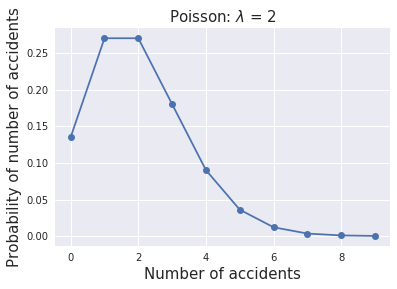

In [125]:
from scipy.stats import poisson
rate = 2
n = np.arange(0, 10)
y = poisson.pmf(n, rate)

plt.plot(n, y, 'o-')
plt.title('Poisson: $\lambda$ = %i' %rate, fontsize=15 )
plt.xlabel('Number of accidents', fontsize=15 )
plt.ylabel('Probability of number of accidents', fontsize=15 )
plt.show()

We can simulate several random variables from a Poisson distribution

In [126]:
data = poisson.rvs(mu=rate,size=100000)
print("Mean: %g " %np.mean(data))
print("SD: %g " %np.std(data,ddof=1))
print("--"*10)
mean, var, skew, kurt = poisson.stats(mu=rate, moments='mvsk')
print("Mean: %g " %mean)
print("SD: %g " %np.sqrt(var))
print("Skewness: %g " %skew)
print("Kurtosis: %g " %kurt)




Mean: 2.00012 
SD: 1.41817 
--------------------
Mean: 2 
SD: 1.41421 
Skewness: 0.707107 
Kurtosis: 0.5 


- ### Continuous distributions (probability dess functions):

  * #### Normal
  The normal distribution is a continuous distribution or a function that can take on values anywhere on the real line. The normal distribution is parameterized by two parameters: the **mean** of the distribution $\mu$ and the **variance** $\sigma^2$.

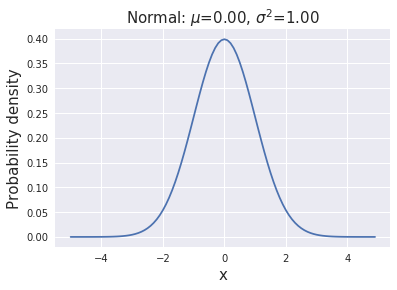

In [127]:
from scipy.stats import norm

mu = 0
sigma = 1
x = np.arange(-5, 5, 0.1)

y = norm.pdf(x, 0, 1)
plt.plot(x,y)
plt.title('Normal: $\mu$=%.2f, $\sigma^2$=%.2f'%(mu,sigma**2), fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('Probability density', fontsize=15)
plt.show()

We can draw several samples from the distribution

Mean: 0.0196652 
SD: 0.994243 
--------------------


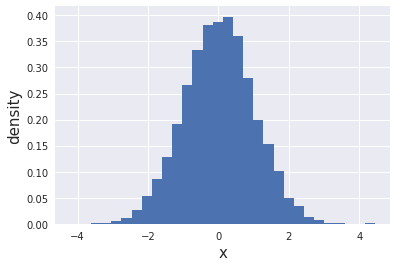

In [128]:
data = norm.rvs(loc= mu, scale=sigma, size=10000)
print("Mean: %g " %np.mean(data))
print("SD: %g " %np.std(data,ddof=1))
print("--"*10)
plt.hist(data,normed=True,bins=30)
plt.xlabel("x", fontsize=15)
plt.ylabel("density", fontsize=15)
plt.show()

#### Uniform

Probability distribution where each value within a certain range $[a,b]$ is equally likely to occur and values outside of the range never occur. 



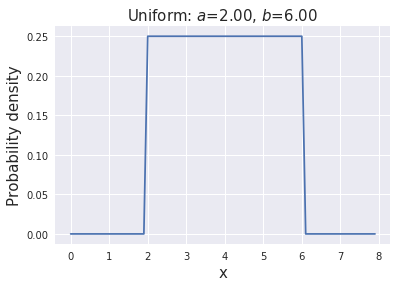

In [129]:
from scipy.stats import uniform

a = 2
b = 6
x = np.arange(0,8,0.1)

y = uniform.pdf(x, loc=a, scale=b-a)
plt.plot(x,y)
plt.title('Uniform: $a$=%.2f, $b$=%.2f'%(a,b), fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('Probability density', fontsize=15)
plt.show()

Similar to the previous distributions we may draw samples from the uniform distribution

Mean: 4.00214 
SD: 1.15449 
--------------------


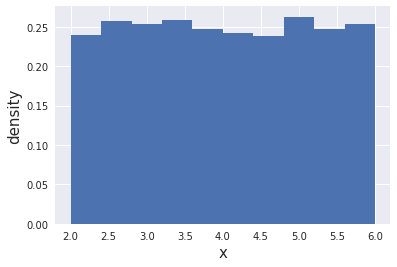

In [130]:
data = uniform.rvs(loc= a, scale=b-a, size=10000)
print("Mean: %g " %np.mean(data))
print("SD: %g " %np.std(data,ddof=1))
print("--"*10)
plt.hist(data,normed=True)
plt.xlabel("x", fontsize=15)
plt.ylabel("density", fontsize=15)
plt.show()

#### Exponential
The exponential distribution represents the amount of time you have to wait before an event occurs given a certain occurrence **rate** $\lambda$ for a process in which **events occur continuously** and **independently**.
$$E[X] = \frac{1}{\lambda}$$
$$Var[X] = \frac{1}{\lambda^2}$$



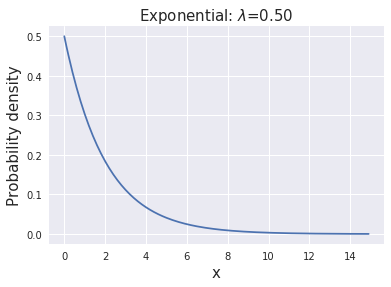

In [131]:
from scipy.stats import expon

lambd = 0.5
x = np.arange(0, 15, 0.1)
y = expon.pdf(x,scale=1./lambd)

plt.plot(x,y)
plt.title('Exponential: $\lambda$=%.2f'%(lambd), fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('Probability density', fontsize=15)
plt.show()

Similarly simulating 10000 random variables from an exponetial distribution

Mean: 1.98656 
SD: 2.00499 
--------------------


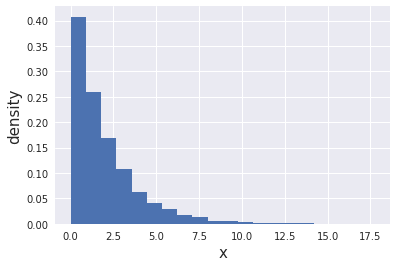

In [132]:
data = expon.rvs(scale=2, size=10000)
print("Mean: %g " %np.mean(data))
print("SD: %g " %np.std(data,ddof=1))
print("--"*10)
plt.hist(data,normed=True,bins=20)
plt.xlabel("x", fontsize=15)
plt.ylabel("density", fontsize=15)
plt.show()

## Point Estimates

Estimtes of population parameters based on sample data.

A **population** is the set of all elements from whom  samples are drawn.

> E.g. Average sleeping duration of women at age 40-45: we would conduct a survey and then use the average sleeping duration of the responders as a point estimate of the average sleeping duration of the whole population. 

The average of a sample is known as the **sample mean**.

In [133]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
import seaborn

In [134]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372000000001

In [135]:
np.random.seed(10)
#Sample some values
sample_ages = np.random.choice(a= population_ages,size=500)
# Show sample mean
print( sample_ages.mean() )                         
# Check difference between population and sample mean
population_ages.mean() - sample_ages.mean()  

42.378


0.62437200000000104

The point estimate based on a sample of size $n=500$ underestimates the true population mean, but it is still fairly close.

So we may get a fairly accurate estimate of a large population by sampling a relativelly small sample of individuals.

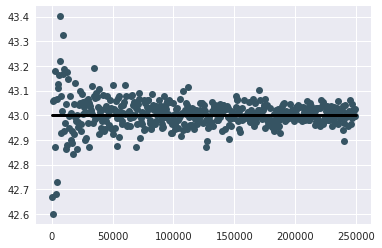

In [136]:
sizes = np.arange(500,250000,500)
for sz in sizes:
    sample_ages = np.random.choice(a= population_ages,size=sz)
    plt.plot(sz,sample_ages.mean(),'o',color='#365463')
plt.plot( [0,250000],[population_ages.mean(),population_ages.mean()] ,'k',lw=3)   

The more samples we take, the better our estimate of the population parameter is likely to be.

## Central Limit Theorem

Several statistical procedures assume that data follows a normal distribution, since the normal distribution has nice properties like symmetry and having the majority of the data clustered within a few standard deviations from the mean.

However, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed. 

-0.12008483603917186


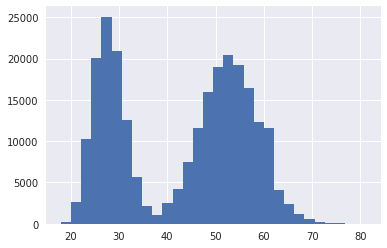

In [137]:
print( stats.skew(population_ages) )
_ = plt.hist(population_ages,30)

The distribution has low skewness, but the data are far from normally distributed, they follow a bimodal distribution.

The sample we took from the population should follow approximatelly the same distribution with the underlying population.
Indeed,

-0.1682268762213313


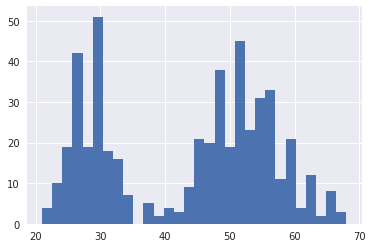

In [138]:
sample_ages = np.random.choice(a= population_ages,size=500)
print( stats.skew(sample_ages) )
_ = plt.hist(sample_ages,30)

Hence it seems not sensible to apply techniques that assume normally distributed data to this data set. Or?

Thanks to the **Central Limit Theorem** we can!
According to the theorem, the distribution of many sample means, known as _sampling distribution_ will be normally distributed. And this holds even in settigns where the underlying distribution is not normally distributed.
As a result we may treat the sample mean as if it were drawn from a normal distribution!

So we may create a sampling distribution by taking several different samplings and individually estimate the mean for each of them.

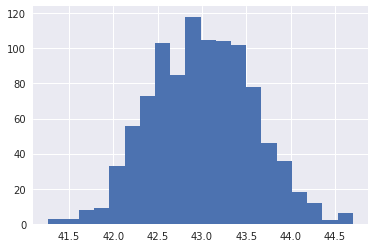

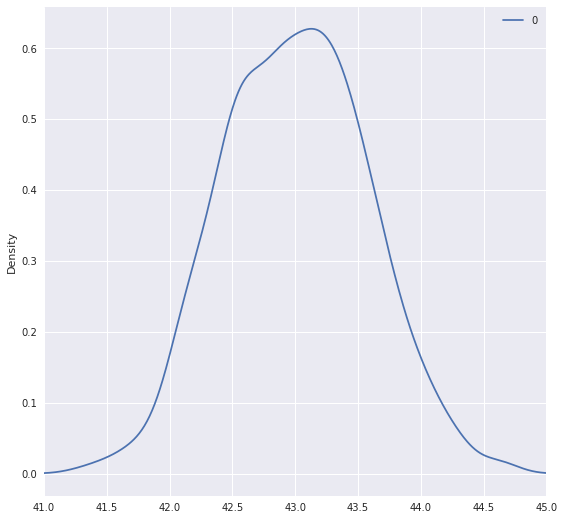

In [139]:
np.random.seed(10)
point_estimates = []        

for _ in range(1000):         
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )

plt.hist(point_estimates,20)
# Plot sample mean density    
pd.DataFrame(point_estimates).plot(kind="density",  
                                   figsize=(9,9),
                                   xlim=(41,45))   

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean

In [140]:
population_ages.mean() - np.array(point_estimates).mean()

-0.00099800000000271893

* **stats._distribution_.rvs()**: generates random samples from the specified distribution with parameters depending on the type of distribution.
*  **stats._distribution_.cdf()**: cumulative distribution
*  **stats._distribution_.ppf()**: inverse cumulative distribution
*  **stats._distribution_.pdf()**:  probability density (height of the distribution) at a given x value

## Confidence Intervals

Point estimates provide a rough insight on a population parameter (e.g. the mean).

BUT estimates are prone to errors, while increasing the sample size is not always feasible.

**Confidence intervals** are value ranges around a point estimate that capture the true population parameter at a pre-sprecified confidence level.

For that, we calculate the error margin and then define the confidence interval having the double spread of the error margin centered around the value of the predicted unknown parameter.


* Assuming **known standard deviation** ($\sigma$) of a population of size $n$ population, the error margin is $$z \cdot \frac{\sigma}{\sqrt{n}}.$$

 <space> <space>$z$ is the *z-critical value*, i.e. the number of standard deviations we would have to go from the mean of a normal distribution to capture the proportion of data associated with the desired confidence intervals.

> For example, for a $95\%$ confidence interval, we would use $z = 2$, since we know that for normally distributed data, $95\%$ of the samples lie within 2 standard deviations from the mean.

However, in practice, it is more exact to get z-critical values with **stats.norm.ppf()** (percent point function = inverse cumulative distribution).

 <space> <space>**Note**: We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the distribution has two tails




So for the $95\% $ confidence interval of our point estimate we have:

In [141]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975) 

print("z-critical value: %.5f"%z_critical) 
# Get the population standard deviation
pop_stdev = population_ages.std()  

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  

print("Confidence interval: [ %.3f,%.3f]"%(confidence_interval))


z-critical value: 1.95996
Confidence interval: [ 41.703,43.343]


Indeed the calculated interval includes the true population mean $43.0023$.

Npw for different samplings we obtain different sample means and therefore different confidence intervals:

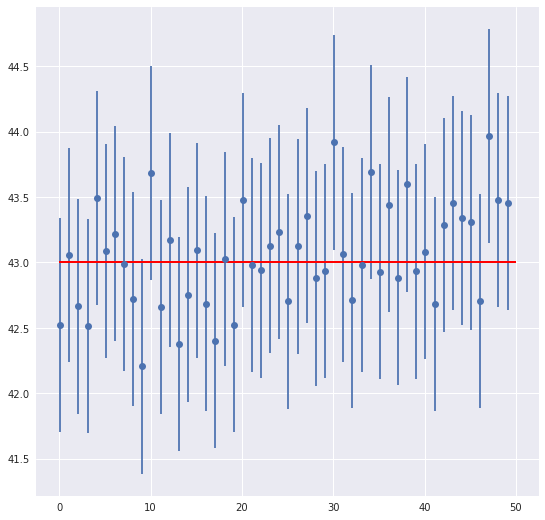

In [142]:
np.random.seed(10)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(50):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)           

    pop_stdev = population_ages.std()  

    #stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(9,9))
plt.errorbar(x=np.arange(0.1, 50, 1), y=sample_means,yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')
plt.hlines(xmin=0, xmax=50,y=43.0023,linewidth=2.0, color="red")

Notice that in the above plot, all but two of the $95\%$ confidence intervals contain the true mean designated by the red line. 

That reflects the actual meaning of confidence intervals: A $95\%$ confidence interval means that $5\%$ of the intervals drawn under identical conditions are expected to miss the true mean of the underlying population.

* For **unknown standard deviation** we may use the estimated standard devition of the sample. 

 <space> <space>Since the sample standard deviation may be inaccurate we expect larger errors compard to the previous setting. 

 <space> <space>To account for this, we may use instead of z-critical value, the *t-critical value*. 

**Note**: When using the t-distribution, we have to supply the degrees of freedom, which in that case equals the sample size minus $1$.

We obtain the t-critical values from the function **stats.t.ppf()**.

In [143]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()
# Get the t-critical value*
t_critical = stats.t.ppf(q = 0.975, df=24)  

print("t-critical value: %.5f"%t_critical)  
sample_stdev = sample.std()  
# Standard deviation estimate
sigma = sample_stdev/math.sqrt(sample_size)  
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)  

print("Confidence interval:[%.3f,%.3f]"%(confidence_interval))


t-critical value: 2.06390
Confidence interval:[37.757,48.003]


Notice that the t-critical value is larger than the corresponding z-value calculated for the same confidence level. This results in a much wider confidence interval to account also for the variability caused by using the sample standard deviation instead of the population one.

However for larger sample sizes, the t-critical value approaches the z-critical value:

In [144]:
# Check the difference between critical values with a sample size of 1000             
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

Alternatively, you may want to use the **stats.t.interval()** function:

In [145]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(37.757112737010608, 48.002887262989397)

## Exercises

* ### Distributions
    * Generate 100000 uniformly distributed values from 0 to 10 and plot the distribution.
    * Create a frozen normal distribution with mean 2 and variance 4. Find the quantiles for the $2.5\%$ and $97.5\%$ cutoff. Visualise the distribution and the identified quantiles.
    * If jobs arrive on the cluster every 15 seconds on average, $\lambda = 4$ per minute 
        - compute the probability of waiting less than or equal to 30 seconds, i.e 0.5 min? 
        - What is the maximum waiting time between two job submissions
with 95% confidence?
    * Accidents occur with a Poisson distribution at an average
of 4 per week. i.e. $\lambda = 4$
        - Compute the probability of more than 5 accidents in
any one week
        - What is the probability that at least two weeks will
elapse between accident?

* ### Point estimators and confidence intervals
    - A study performed on a sample of the student population reports the heights and ages of the surveyed students. Load the file  [survey](https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/MASS/survey.csv) in a dataframe and estimate the population mean height and age.
    - Compute the $95\% $ confidence interval of the above point estimates.
